# Лабораторная работа №3

## Вариант 1


#### 1. Реализуйте рекурсивный алгоритм для нахождения биномиальных коэффициентов, пользуясь следующим определением

Биномиальный коэффициент (n, k) определяется следующим образом:

(n, k) = n! / (k! * (n - k)!)

Можно реализовать рекурсивный алгоритм для нахождения биномиальных коэффициентов, используя следующее рекуррентное соотношение:

(n, k) = (n-1, k) + (n-1, k-1)

Это соотношение позволяет найти биномиальный коэффициент (n, k) через биномиальные коэффициенты (n-1, k) и (n-1, k-1).

In [1]:
def binomial_coefficient(n, k):
    # базовый случай
    if k == 0 or k == n:
        return 1
    # рекурсивный случай
    return binomial_coefficient(n-1, k) + binomial_coefficient(n-1, k-1)


#### 2. Реализуйте алгоритмы из задания 1 не используя рекурсию.

In [2]:
def binomial_coefficient(n, k):
    # создаем таблицу размером (n+1)x(k+1) для хранения промежуточных результатов
    table = [[0 for j in range(k+1)] for i in range(n+1)]
    
    # заполняем первый столбец и первую строку единицами
    for i in range(n+1):
        table[i][0] = 1
    for j in range(k+1):
        table[0][j] = 1
    
    # заполняем таблицу остальными значениями с использованием формулы Бинома
    for i in range(1, n+1):
        for j in range(1, k+1):
            table[i][j] = table[i-1][j-1] + table[i-1][j]
    
    # возвращаем результат
    return table[n][k]


##### 3. Для каждого реализованного алгоритма:

###### 3.1 составьте блок-схему;

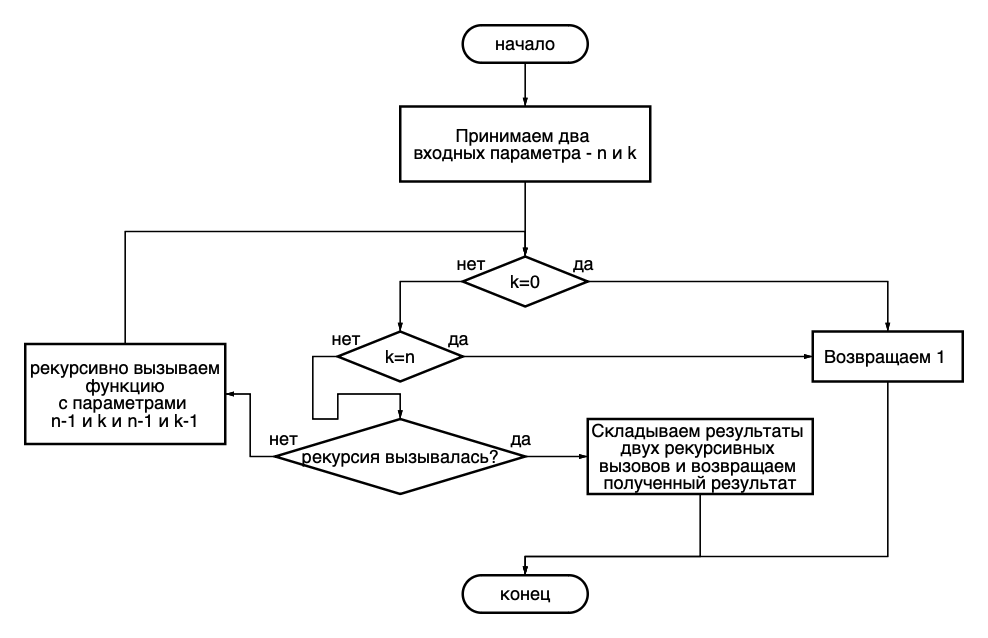

In [11]:
from IPython.display import Image
Image(filename='Desktop/рекур.png')

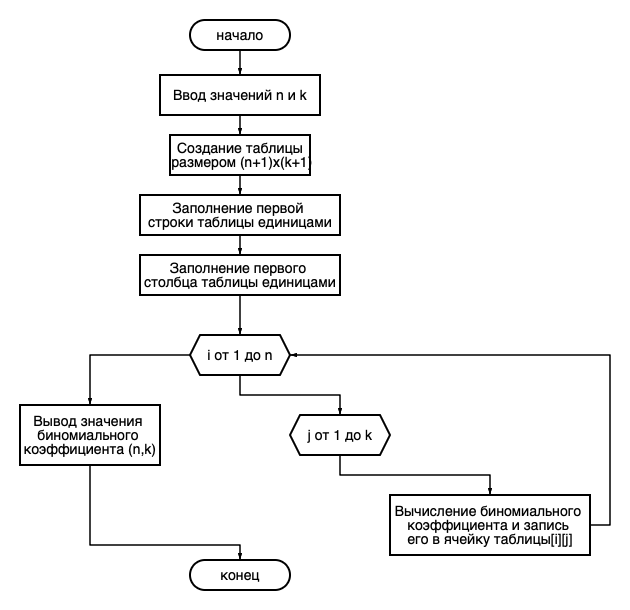

In [12]:
from IPython.display import Image
Image(filename='Desktop/безрек.png')

###### 3.2 оцените верхнюю границу размерности задачи, для которой при рекурсивной реализации не происходит переполнение стека вызовов;

Для рекурсивного алгоритма нахождения биномиальных коэффициентов верхняя граница размерности задачи, при которой не происходит переполнение стека вызовов в Python, будет зависеть от используемой аппаратной платформы и доступной памяти, а также от глубины рекурсии, которая может быть увеличена путем настройки интерпретатора.

В целом, для большинства практических задач, верхняя граница размерности задачи, при которой не происходит переполнение стека вызовов при рекурсивной реализации в Python, может быть достаточно высокой, но для очень больших значений может потребоваться использование других алгоритмов или оптимизаций

##### 3.3 модернизируйте рекурсивную реализацию так, чтобы сохранялись промежуточные результаты вызова рекурсии (реализуйте подобный механизм вручную, а также, с помощью декоратора @memoized);

Ручная мемоизация 

In [3]:
def binomial_coeff(n, k, cache={}):
    if (n, k) in cache:
        return cache[(n, k)]
    if k == 0 or k == n:
        result = 1
    else:
        result = binomial_coeff(n-1, k-1) + binomial_coeff(n-1, k)
    cache[(n, k)] = result
    return result


Мемоизация с помощью декоратора

In [4]:
def memoized(fn):
    cache = {}
    def wrapped(*args):
        if args in cache:
            return cache[args]
        result = fn(*args)
        cache[args] = result
        return result
    return wrapped

@memoized
def binomial_coeff(n, k):
    if k == 0 or k == n:
        return 1
    else:
        return binomial_coeff(n-1, k-1) + binomial_coeff(n-1, k)


##### 3.4 сравните производительность реализованных алгоритмов (количество итераций (соответственно вызовов рекурсии) подбирайте исходя из условий задачи).

In [9]:
# Рекурсивная функция с мемоизацией
def binomial_coeff_memo(n, k, cache={}):
    if (n, k) in cache:
        return cache[(n, k)]
    if k == 0 or k == n:
        result = 1
    else:
        result = binomial_coeff_memo(n-1, k-1) + binomial_coeff_memo(n-1, k)
    cache[(n, k)] = result
    return result

# Рекурсивная функция без мемоизации
def binomial_coeff(n, k):
    if k == 0 or k == n:
        return 1
    else:
        return binomial_coeff(n-1, k-1) + binomial_coeff(n-1, k)


In [10]:
import time

# Замер времени выполнения функции с мемоизацией
start_time = time.time()
binomial_coeff_memo(30, 15)
end_time = time.time()
time_memo = end_time - start_time

# Замер времени выполнения функции без мемоизации
start_time = time.time()
binomial_coeff(30, 15)
end_time = time.time()
time_no_memo = end_time - start_time

print(f"Время выполнения функции с мемоизацией: {time_memo:.8f} секунд")
print(f"Время выполнения функции без мемоизации: {time_no_memo:.8f} секунд")


Время выполнения функции с мемоизацией: 0.00020981 секунд
Время выполнения функции без мемоизации: 21.81620789 секунд
